# Data Exploration
### Initial data exploration of datasets in jupyter notebook  

---
# Uppgift 1 - uppvärmning covid-19 data

In [473]:
import pandas as pd
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt

# setting up file variables
file_path = "Data/Folkhalsomyndigheten_Covid19.xlsx"
sheet = "Veckodata Riket"

# reading file to a dataframe
df = pd.read_excel(file_path, sheet_name = sheet)

df.head()


,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


---
a) Initial data analysis

In [474]:
df.info() # datatypes are all numbers, not missing any values, looks good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

---
b) add columns "år" and "veckonummer" to a column "vecka" in the following format: YYYYvW


In [475]:
# creating new column "Vecka" of strings from "år" and "veckonummer" separated by "v", and inserting it at position 0 of the dataframe
df.insert(0, "Vecka", df["år"].astype(str) + "v" + df["veckonummer"].astype(str)) # taking column values as string in order to get the correct datatype
df["Vecka"].head() # results in column with format YYYYvW

0     2020v6
1     2020v7
2     2020v8
3     2020v9
4    2020v10
Name: Vecka, dtype: object

---
Using both Seaborn and Plotly Express:  
c) Draw a line chart of deceased per week from 2020v6 until present  
d) Draw a line chart of new cases per week from 2020v6 until present  
e) Draw a line chart of deceased per week and new cases per week from 2020v6 until present  
f) Draw a line chart of cumulative amount cases from 2020v6 until present

In [476]:
#create DataFrames
df1 = pd.DataFrame({'year': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                    'sales': [14, 16, 19, 22, 24, 25, 24, 24, 27, 30]})

df2 = pd.DataFrame({'year': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                    'leads': [4, 4, 4, 5, 4, 5, 7, 8, 5, 3]})

C:\Users\Andre\AppData\Local\Temp\ipykernel_29756\786312137.py:21: MatplotlibDeprecationWarning:

Passing argument *p* of unexpected type AxesSubplot to add_patch which only accepts <class 'matplotlib.patches.Patch'> is deprecated since 3.5 and will become an error two minor releases later.



ValueError: Can not reset the axes.  You are probably trying to re-use an artist in more than one Axes which is not supported

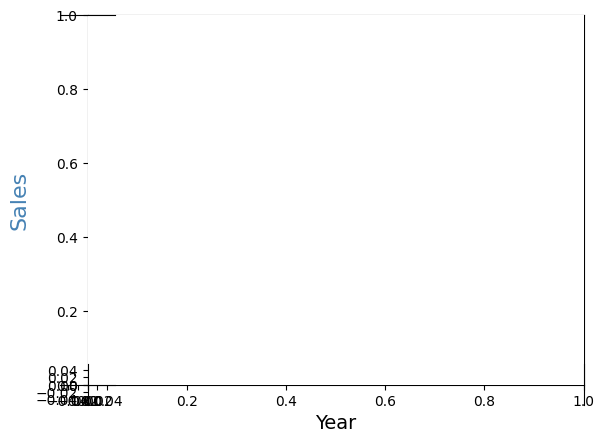

In [477]:
import matplotlib.pyplot as plt

#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig, axes = plt.subplots()

#add first line to plot
ax = plt.axes()

ax.plot(df1.year, df1.sales, color=col1)

#add x-axis label
ax.set_xlabel('Year', fontsize=14)

#add y-axis label
ax.set_ylabel('Sales', color=col1, fontsize=16)

axes.add_patch(ax)
#define second y-axis that shares x-axis with current plot
#ax2 = ax.twinx()
ax2 = plt.axes()
ax2.yaxis.tick_right()

#add second line to plot
ax2.plot(df2.year, df2.leads, color=col2)

#add second y-axis label
ax2.set_ylabel('Leads', color=col2, fontsize=16)

axes.add_patch(ax2)

## Drawing 2x2 plot using Seaborn

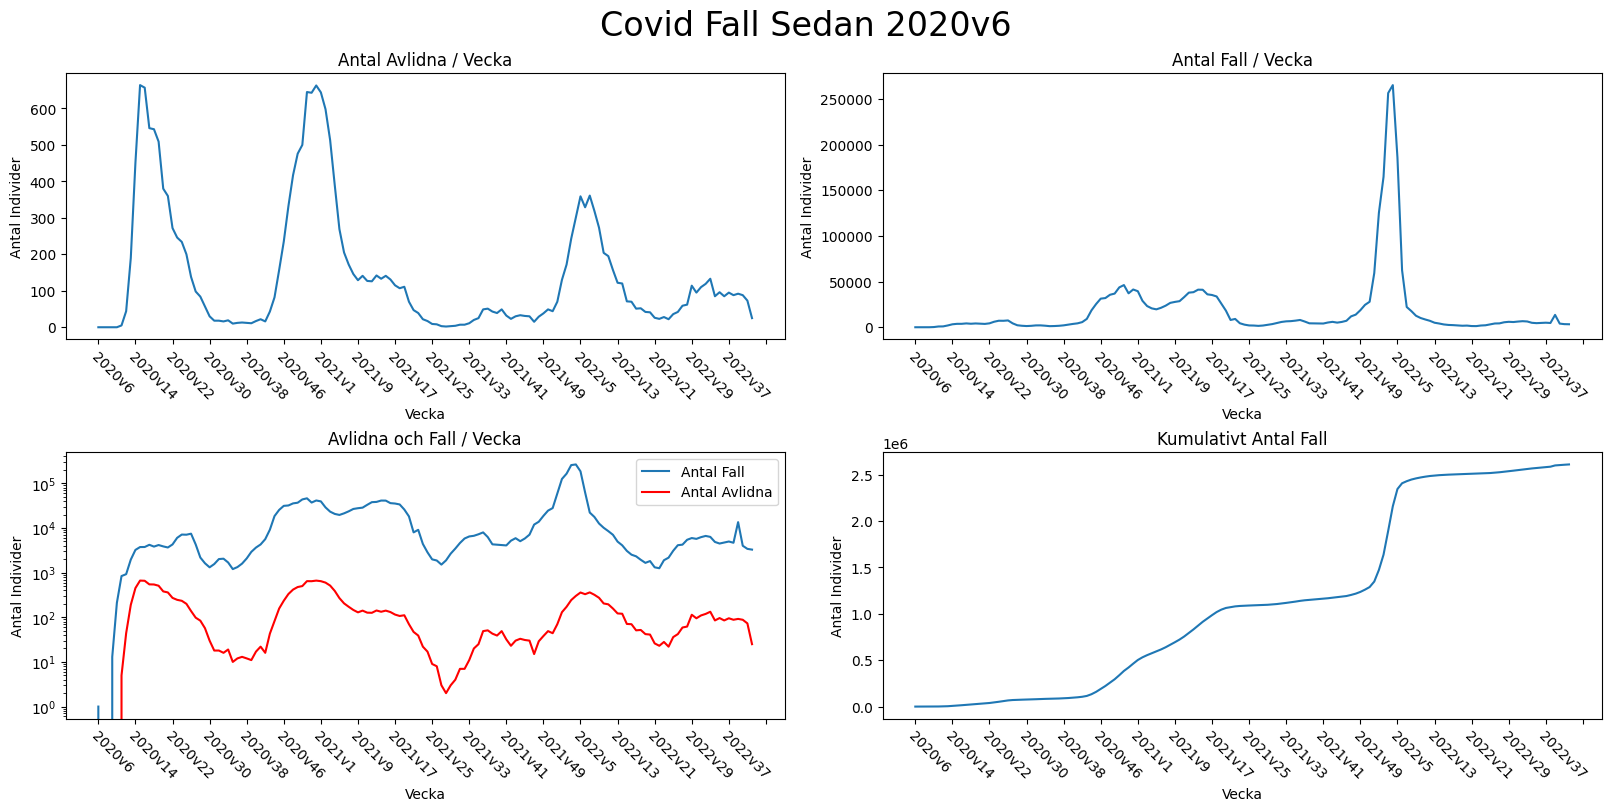

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (16, 8), constrained_layout = False)

titles = ["Antal Avlidna / Vecka", "Antal Fall / Vecka", "Avlidna och Fall / Vecka", "Kumulativt Antal Fall"]
y_lables = ["Antal Individer"] * 4

sns.lineplot(df, x = "Vecka", y = "Antal_avlidna_vecka", ax = axes[0, 0])
sns.lineplot(df, x = "Vecka", y = "Antal_fall_vecka", ax = axes[0, 1])
sns.lineplot(df, x = "Vecka", y = "Antal_fall_vecka", ax = axes[1, 0], label = "Antal Fall") # TODO: using log scale shows strange result on 2020v6 (0 cases)
sns.lineplot(df, x = "Vecka", y = "Antal_avlidna_vecka", ax = axes[1, 0], label = "Antal Avlidna", color = "red")
axes[1, 0].set_yscale('log')
sns.lineplot(df, x = "Vecka", y = "Kum_antal_fall", ax = axes[1, 1])

for ax, title, y_label in zip(axes.reshape(-1), titles, y_lables):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # showing 20 tick labels
    ax.xaxis.set_tick_params(rotation=-45) # draws ticks at bottom of x axis with rotation
    plt.setp(ax.get_xticklabels(), ha="left", rotation_mode="anchor") # anchor left part of label to tick

fig.suptitle("Covid Fall Sedan 2020v6", fontsize = 24);

## Drawing plots using Plotly Express

In [ ]:
# TODO: add titles and labels

In [ ]:
px.line(df, x = "Vecka", y = "Antal_avlidna_vecka")

In [ ]:
px.line(df, x = "Vecka", y = "Antal_fall_vecka")

In [ ]:
px.line(df, x = "Vecka", y = ["Antal_avlidna_vecka", "Antal_fall_vecka"])

In [ ]:
px.line(df, x = "Vecka", y = "Kum_antal_fall")


---
# Uppgift 2 - uppvärmning vaccindata

In [ ]:
# setting up file variables
file_path = "Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx"
sheet = "Vaccinerade kommun och ålder"

# reading file to a dataframe
df = pd.read_excel(file_path, sheet_name = sheet)

df.head()

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,NaN,NaN,0.697423,0.627598,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4887,4469,1959.0,NaN,0.730275,0.667812,0.292738,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5542,5240,2878.0,NaN,0.755865,0.714675,0.392526,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5592,5429,3719.0,NaN,0.805068,0.781601,0.535416,NaN


In [ ]:
df.info() # note some missing values (for doses not yet distributed to certain age groups), and age ranges are not numbers
# nothing that needs to (or can) be changed), but important to take not of for later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Län                  2900 non-null   int64  
 1   Län_namn             2900 non-null   object 
 2   Kommun               2900 non-null   int64  
 3   Kommun_namn          2900 non-null   object 
 4   Ålder                2900 non-null   object 
 5   Befolkning           2900 non-null   int64  
 6   Antal minst 1 dos    2900 non-null   int64  
 7   Antal minst 2 doser  2900 non-null   int64  
 8   Antal 3 doser        2320 non-null   float64
 9   Antal 4 doser        870 non-null    float64
 10  Andel minst 1 dos    2900 non-null   float64
 11  Andel minst 2 doser  2900 non-null   float64
 12  Andel 3 doser        2320 non-null   float64
 13  Andel 4 doser        870 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 317.3+ KB


---
a) How many län are represented in the dataset? vad heter län på engelska..?

In [ ]:
len(df["Län_namn"].unique()) # 21 län representerade

21

In [ ]:
df["Län_namn"].unique() # no duplicates with different spelling (typos) in the set at a manual overview

array(['Stockholms län', 'Uppsala län', 'Södermanlands län',
       'Östergötlands län', 'Jönköpings län', 'Kronobergs län',
       'Kalmar län', 'Gotlands län', 'Blekinge län', 'Skåne län',
       'Hallands län', 'Västra Götalands län', 'Värmlands län',
       'Örebro län', 'Västmanlands län', 'Dalarnas län', 'Gävleborgs län',
       'Västernorrlands län', 'Jämtlands län', 'Västerbottens län',
       'Norrbottens län'], dtype=object)

---
b) How many kommunes are represented in the dataset? vad heter kommun på engelska..?

In [ ]:
len(df["Kommun_namn"].unique()) # 290 kommuner är representerade

290

In [ ]:
df["Kommun_namn"].unique() # can't spot any obvious duplicates with different spelling (typos) at a quick manual overview

array(['Upplands Väsby', 'Vallentuna', 'Österåker', 'Värmdö', 'Järfälla',
       'Ekerö', 'Huddinge', 'Botkyrka', 'Salem', 'Haninge', 'Tyresö',
       'Upplands-Bro', 'Nykvarn', 'Täby', 'Danderyd', 'Sollentuna',
       'Stockholm', 'Södertälje', 'Nacka', 'Sundbyberg', 'Solna',
       'Lidingö', 'Vaxholm', 'Norrtälje', 'Sigtuna', 'Nynäshamn', 'Håbo',
       'Älvkarleby', 'Knivsta', 'Heby', 'Tierp', 'Uppsala', 'Enköping',
       'Östhammar', 'Vingåker', 'Gnesta', 'Nyköping', 'Oxelösund', 'Flen',
       'Katrineholm', 'Eskilstuna', 'Strängnäs', 'Trosa', 'Ödeshög',
       'Ydre', 'Kinda', 'Boxholm', 'Åtvidaberg', 'Finspång',
       'Valdemarsvik', 'Linköping', 'Norrköping', 'Söderköping', 'Motala',
       'Vadstena', 'Mjölby', 'Aneby', 'Gnosjö', 'Mullsjö', 'Habo',
       'Gislaved', 'Vaggeryd', 'Jönköping', 'Nässjö', 'Värnamo', 'Sävsjö',
       'Vetlanda', 'Eksjö', 'Tranås', 'Uppvidinge', 'Lessebo', 'Tingsryd',
       'Alvesta', 'Älmhult', 'Markaryd', 'Växjö', 'Ljungby', 'Högsby',
       '

---
c) What size is the population represented in the dataset?

In [ ]:
df["Befolkning"].sum() # 9_092_790 is the population represented in the dataset

9092790

---
d) Calculate the amount of children under the age of 18 there are in Sweden based on this dataset

In [ ]:
amount_children_12_17 = df["Befolkning"][df["Ålder"] == "12-15"].sum() + df["Befolkning"][df["Ålder"] == "16-17"].sum()
amount_children_12_17 # 745370 children of age 12-17 according to this dataset

745370

In [ ]:
# assuming roughly equal distribution of children in ages below 12
pop_per_age = amount_children_12_17 / 6
ages_0_17 = 18
amount_children_under_18 = pop_per_age * ages_0_17
print(f"Amount of children under the age of 18 should be roughly {round(amount_children_under_18)} based on this dataset")

Amount of children under the age of 18 should be roughly 2236110 based on this dataset


In [ ]:
# reading in downloaded data on population of sweden under the age of 18
# (from: https://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__BE__BE0101__BE0101A/FolkmangdNov/)
file_path = "Data/Sveriges_befolkning_under_18.xlsx"

df_under18 = pd.read_excel(file_path, header = 2)

df_under18.drop(df_under18.columns[0:3], axis = "columns", inplace = True)
df_under18 # lots of nan values to deal with

,2021
0,50261.0
1,47919.0
2,59092.0
3,55760.0
4,60536.0
...,...
79,NaN
80,NaN
81,NaN
82,NaN


In [ ]:
df_under18.dropna(inplace = True) # removing nans
df_under18.info() # 36 non-nulls of float remaining (the 18 age groups 0-17 for boys and girls)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2021    36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [478]:
df_under18["2021"].sum() # the sum to compare our result with

2179896.0

In [479]:
diff = (amount_children_under_18 - df_under18["2021"].sum()) / amount_children_under_18
print(f"Difference between dataset estimation and real numbers is {diff * 100:.1f}%")

Difference between dataset estimation and real numbers is 2.5%


In [ ]:
# # control calculation (numbers according to "Sveriges Befolkningspyramid" from SCB)
# pop_10_19 = 322_770 + 304_297 + 304_562 + 286_409 # male + female age 10-14 and male + female age 15-19
# pop_10_19_average = pop_10_19 / 10 # average pop per age of 15-19 year olds
# print(f"Average population/age from age 10-19: {pop_10_19_average}")

# pop_12_17 = pop_10_19_average * 6 # assuming distribution is relatively similar for 12-14 year olds
# print(f"Estimated population in age group 12-17 using above numbers: {pop_12_17}")

# difference_comp_data_result = (amount_children_12_17 - pop_12_17) / amount_children_12_17
# print(f"Difference between dataset calculation result and estimate: {difference_comp_data_result * 100:.2f}%") # a difference of ~1.95%
# # this points to the result from the dataset calculation being roughly accurate

Average population/age from age 10-19: 121803.8
Estimated population in age group 12-17 using above numbers: 730822.8
Difference between dataset calculation result and estimate: 1.95%


In [ ]:
df["Befolkning"].mask((df["Ålder"] == "12-15") | (df["Ålder"] == "16-17")).sum() # wrong result, not sure how mask works i suppose

8347420.0

In [ ]:
sum(df["Befolkning"].mask((df["Ålder"] == "12-15") | (df["Ålder"] == "16-17"))) # why does this return nan when the example above works?

nan